In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Tesla.csv")
df.head()

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [4]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

        Volume  
0     18766300  
1     17187100  
2      8218800  
3      5139800  
4      6866900  
...        ...  
2411  11788500  
2412  17801500  
2413  29005700  
2414  15719300  
2415  47065000  

[2416 rows x 7 columns]

In [5]:
df.shape

(2416, 7)

In [6]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2416.000000  2416.000000  2416.000000  2416.000000  2416.000000   
mean    186.271147   189.578224   182.916639   186.403651   186.403651   
std     118.740163   120.892329   116.857591   119.136020   119.136020   
min      16.139999    16.629999    14.980000    15.800000    15.800000   
25%      34.342498    34.897501    33.587501    34.400002    34.400002   
50%     213.035003   216.745002   208.870002   212.960007   212.960007   
75%     266.450012   270.927513   262.102501   266.774994   266.774994   
max     673.690002   786.140015   673.520020   780.000000   780.000000   

             Volume  
count  2.416000e+03  
mean   5.572722e+06  
std    4.987809e+06  
min    1.185000e+05  
25%    1.899275e+06  
50%    4.578400e+06  
75%    7.361150e+06  
max    4.706500e+07

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


# Exploratory Data Analysis

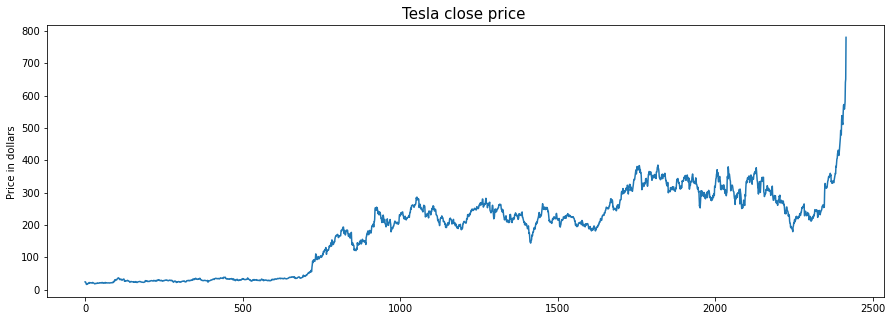

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df["Close"])
plt.title("Tesla close price ", fontsize=15)
plt.ylabel("Price in dollars ")
plt.show()

In [10]:
#to check if data in close and adj close is same for each row

df[df["Close"] == df["Adj Close"]].shape

(2416, 7)

In [11]:
#here we can see the data in both columns are same for all the rows.
#so having redundant data in dataser is not going to help so, we'll drop this column before further analysis.

df = df.drop(["Adj Close"], axis=1)

In [12]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

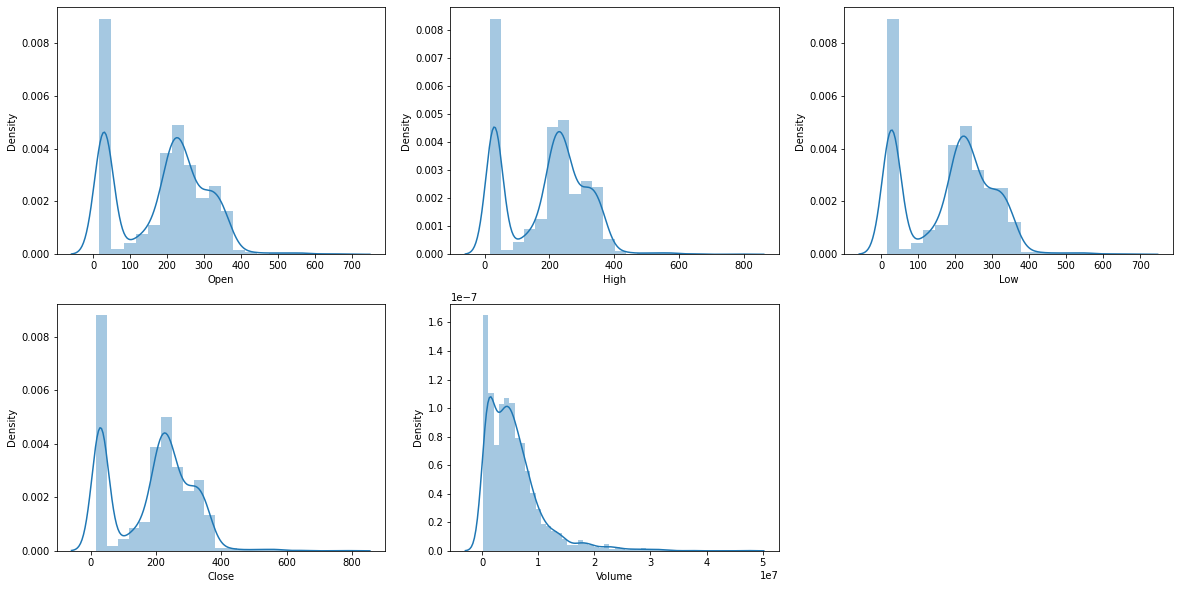

In [13]:
features = ["Open", "High", "Low", "Close", "Volume"]
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col])
plt.show()

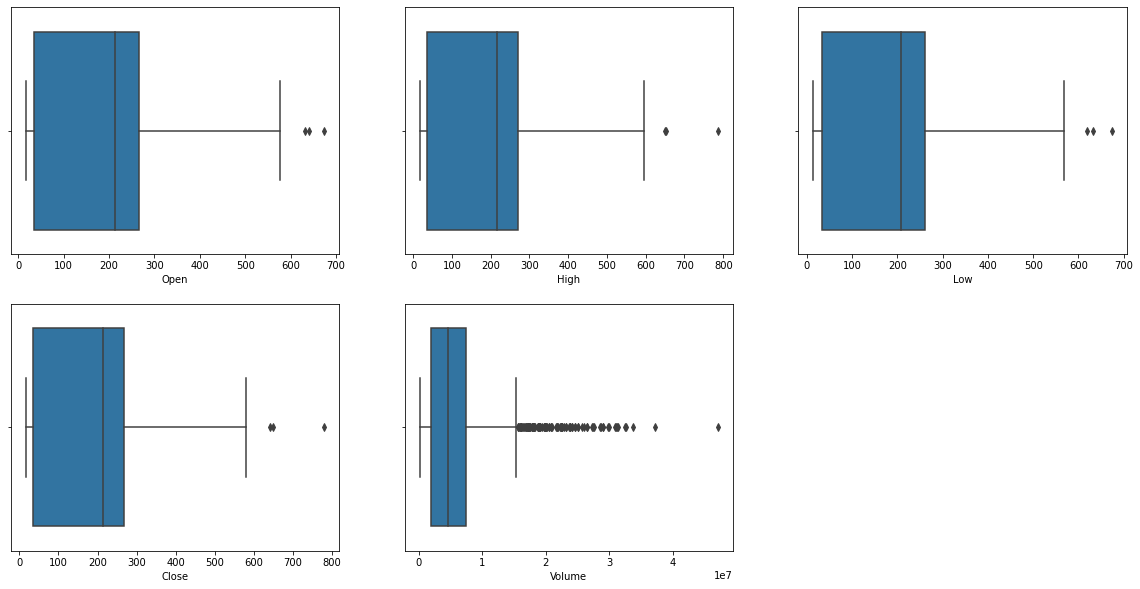

In [14]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(df[col])
plt.show()

# Feature Engineering

In [19]:
df.head()

Date       Open   High        Low      Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001   6866900

In [22]:
#feature enginnering helps to derive some valuable features from the existing ones.
#These extra features sometimeshelp in increasing the performance of the model significantly and
#certainly help to gain deeper insights of data.

splitted = df["Date"].str.split("-", expand = True)

df["day"] = splitted[2].astype('int')
df["month"] = splitted[1].astype("int")
df["year"] = splitted[0].astype("int")

df.head()

Date       Open   High        Low      Close    Volume  day  month  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  18766300   29      6   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  17187100   30      6   
2  2010-07-01  25.000000  25.92  20.270000  21.959999   8218800    1      7   
3  2010-07-02  23.000000  23.10  18.709999  19.200001   5139800    2      7   
4  2010-07-06  20.000000  20.00  15.830000  16.110001   6866900    6      7   

   year  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010

In [23]:
df["is_quarter_end"] = np.where(df["month"]%3 == 0,1,0)
df.head()

Date       Open   High        Low      Close    Volume  day  month  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  18766300   29      6   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  17187100   30      6   
2  2010-07-01  25.000000  25.92  20.270000  21.959999   8218800    1      7   
3  2010-07-02  23.000000  23.10  18.709999  19.200001   5139800    2      7   
4  2010-07-06  20.000000  20.00  15.830000  16.110001   6866900    6      7   

   year  is_quarter_end  
0  2010               1  
1  2010               1  
2  2010               0  
3  2010               0  
4  2010               0

In [24]:
#A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. 
#These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

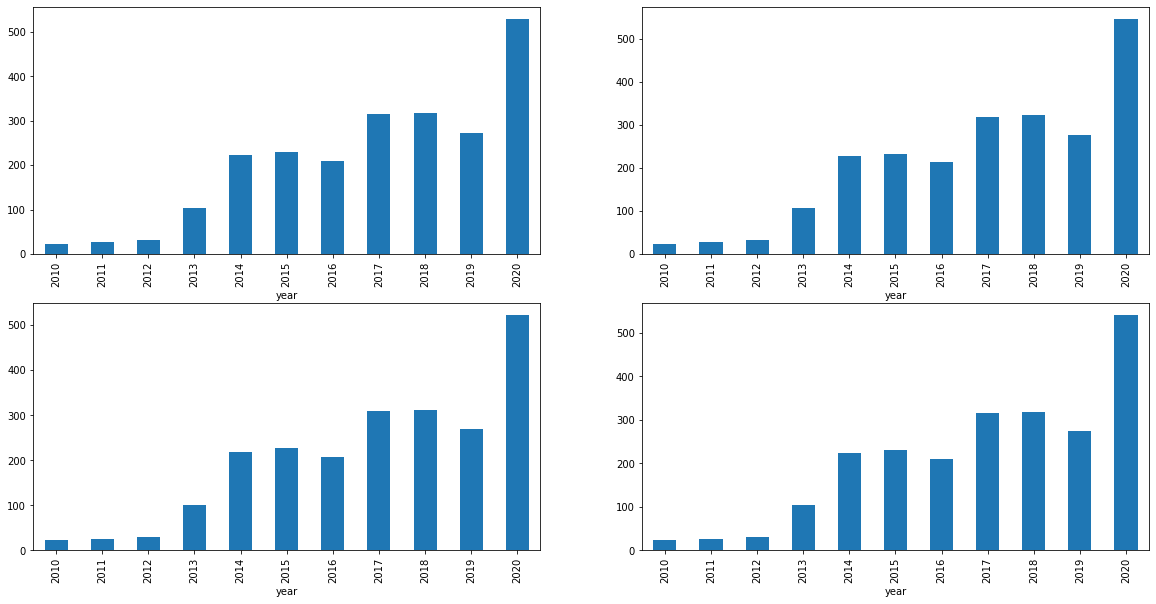

In [25]:
data_grouped = df.groupby("year").mean()
plt.subplots(figsize = (20, 10))

for i, col in enumerate(["Open", "High", "Low", "Close"]):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar()
plt.show()

In [26]:
df.groupby("is_quarter_end").mean()

Open        High         Low       Close        Volume  \
is_quarter_end                                                                 
0               185.875081  189.254226  182.449499  186.085081  5.767062e+06   
1               187.071200  190.232700  183.860262  187.047163  5.180154e+06   

                      day     month         year  
is_quarter_end                                    
0               15.710396  6.173886  2014.816213  
1               15.825000  7.597500  2014.697500

In [27]:
df["open-close"] = df["Open"] - df["Close"]
df["low-high"] = df["Low"] - df["High"]
df["target"] = np.where(df["Close"].shift(-1) > df["Close"], 1, 0)

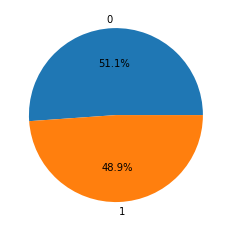

In [29]:
plt.pie(df["target"].value_counts().values, labels=[0, 1], autopct="%1.1f%%")
plt.show()

In [30]:
#When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

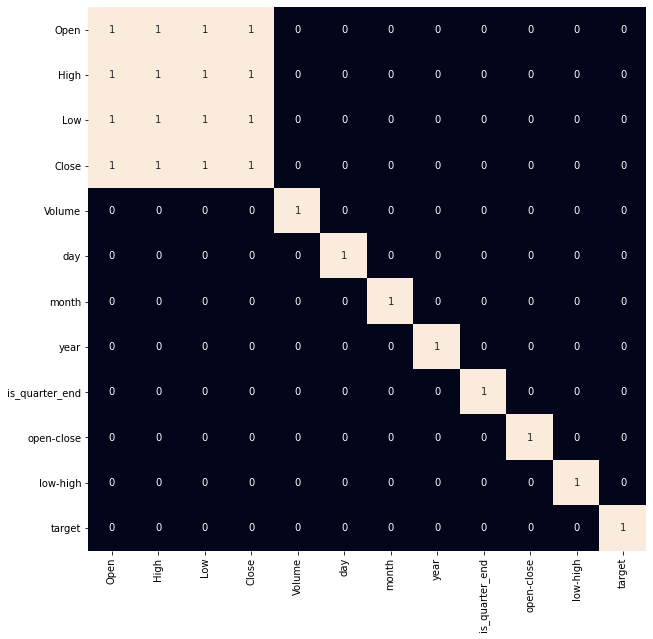

In [32]:
plt.figure(figsize=(10, 10))

#As our concern is with highly correlated features only so, we will visualize our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [33]:
#From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, 
#and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data Splitting and Normalization

In [34]:
df.head()

Date       Open   High        Low      Close    Volume  day  month  \
0  2010-06-29  19.000000  25.00  17.540001  23.889999  18766300   29      6   
1  2010-06-30  25.790001  30.42  23.299999  23.830000  17187100   30      6   
2  2010-07-01  25.000000  25.92  20.270000  21.959999   8218800    1      7   
3  2010-07-02  23.000000  23.10  18.709999  19.200001   5139800    2      7   
4  2010-07-06  20.000000  20.00  15.830000  16.110001   6866900    6      7   

   year  is_quarter_end  open-close  low-high  target  
0  2010               1   -4.889999 -7.459999       0  
1  2010               1    1.960001 -7.120001       0  
2  2010               0    3.040001 -5.650000       0  
3  2010               0    3.799999 -4.390001       0  
4  2010               0    3.889999 -4.170000       0

In [36]:
features = df[["open-close", "low-high", "is_quarter_end"]]
target = df["target"]

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


# Model Development and Evaluation

In [37]:
# Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), 
# and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

# For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 
# we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure 
# the accuracy of the predictions.

In [38]:
models = [LogisticRegression(), SVC(kernel="poly", probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f"{models[i]} : ")
    print("Training Accuracy : ", metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print("Validation Accuracy : ", metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4705482670595258
Validation Accuracy :  0.5374931581828134

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  0.968013309795654
Validation Accuracy :  0.4177

In [39]:
# From above we can see accuracies for all three models.

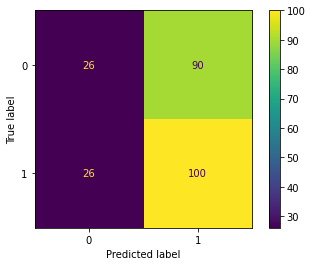

In [40]:
# Now lets plot a confusion matrix for the validation data.

metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

In [41]:
# We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. 
# Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.